# Data Preprocessing

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time

### Importing the Data and adjusting the format into a readable pandas df

In [ ]:
"""

# Best Track Data (HURDAT2)

Atlantic hurricane database (HURDAT2) 1851-2022 (5.9MB download)
This dataset includes the 2022 update to the best tracks.

This dataset (known as Atlantic HURDAT2) has a comma-delimited, text format with six-hourly information on the location, maximum winds, central pressure,
and (beginning in 2004) size of all known tropical cyclones and subtropical cyclones.
The original HURDAT database has been retired.

Detailed information regarding the Atlantic Hurricane Database Re-analysis Project is available from the Hurricane Research Division.

ref:https://www.nhc.noaa.gov/data/

# https://www.nhc.noaa.gov/data/hurdat/hurdat2-format-atlantic.pdf
# HURDAT2 Processor

This is a python script that converts the HURDAT to a dataframe and generate a CSV file. 
The script was adapted from Etmad, et.al's work as part of trajectory segmentation research[1].
[1]: Etemad, Mohammad, et al. "A Trajectory Segmentation Algorithm Based on Interpolation-based Change Detection Strategies." EDBT/ICDT Workshops. 2019.

"""
import pandas as pd
Record_identifier_dic={'C':"Closest approach to a coast, not followed by a landfall"
,'G':"Genesis"
,'I':"An intensity peak in terms of both pressure and wind"
,'L':"Landfall (center of system crossing a coastline)"
,'P':"Minimum in central pressure"
,'R':"Provides additional detail on the intensity of the cyclone when rapid changes are underway"
,'S':"Change of status of the system"
,'T':"Provides additional detail on the track (position) of the cyclone"
,'W':"Maximum sustained wind speed"}
Status_of_system_dic={
'TD':"Tropical cyclone of tropical depression intensity (< 34 knots)"
,'TS':"Tropical cyclone of tropical storm intensity (34-63 knots)"
,'HU':"Tropical cyclone of hurricane intensity (> 64 knots)"
,'EX':"Extratropical cyclone (of any intensity)"
,'SD':"Subtropical cyclone of subtropical depression intensity (< 34 knots)"
,'SS':"Subtropical cyclone of subtropical storm intensity (> 34 knots)"
,'LO':"A low that is neither a tropical cyclone, a subtropical cyclone, nor an extratropical cyclone (of any intensity)"
,'WV':"Tropical Wave (of any intensity)"
,'DB':"Disturbance (of any intensity)"} 
    
def process_details(data):
    data=data.split(',')
    Year=int(data[0][0:4])
    Month=int(data[0][4:6])
    Day=int(data[0][6:8])
    Hours_in_UTC=int(data[1][0:5])
    Minutes_in_UTC=int(data[1][2:4])
    Record_identifier=data[2].strip()
    try:
        Record_identifier_desc=Record_identifier_dic[data[2].strip()]
    except:
        Record_identifier_desc=None
        
    Status_of_system=data[3].strip()
    try:
        Status_of_system_desc=Status_of_system_dic[Status_of_system]
    except:
        Status_of_system_desc=None
        
    if data[4].strip()[-1:] in ('N','S'):
        if data[4].strip()[-1:]=='N':
            Latitude=float(data[4].strip()[:-1])
        else:
            Latitude=-1.0*float(data[4].strip()[:-1])
    else:
        Latitude=-999
    
    if data[5].strip()[-1:] in ('E','W'):
        if data[5].strip()[-1:]=='E':
            Longitude=float(data[5].strip()[:-1])
        else:
            Longitude=-1.0*float(data[5].strip()[:-1])
    else:
        Longitude=-999
    Maximum_sustained_wind_in_knots=float(data[6].strip())
    Minimum_Pressure_in_millibars=float(data[7].strip())
    i=8
    F34_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F34_kt_wind_radii_maximum_northwestern=float(data[i].strip())
    

    i+=1
    F50_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F50_kt_wind_radii_maximum_northwestern=float(data[i].strip())
    
    i+=1
    F64_kt_wind_radii_maximum_northeastern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_southeastern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_southwestern=float(data[i].strip())
    i+=1
    F64_kt_wind_radii_maximum_northwestern=float(data[i].strip())


    
    res=Year,Month,Day,Hours_in_UTC,Minutes_in_UTC,Record_identifier,Record_identifier_desc,Status_of_system,Status_of_system_desc,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars,F34_kt_wind_radii_maximum_northeastern,F34_kt_wind_radii_maximum_southeastern,F34_kt_wind_radii_maximum_southwestern,F34_kt_wind_radii_maximum_northwestern,F50_kt_wind_radii_maximum_northeastern,F50_kt_wind_radii_maximum_southeastern,F50_kt_wind_radii_maximum_southwestern,F50_kt_wind_radii_maximum_northwestern,F64_kt_wind_radii_maximum_northeastern,F64_kt_wind_radii_maximum_southeastern,F64_kt_wind_radii_maximum_southwestern,F64_kt_wind_radii_maximum_northwestern
    return res

def process_header(data):
    data=data.split(',')
    Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries=data[0][0:2],data[0][2:4],data[0][4:8],data[1].strip(),data[2].strip()
    res=Basin,ATCF_cyclone_number_for_that_year,Year,Name,Number_of_best_track_entries
    return res


def identify_line_type(data):
    print(data.split(','))
    if len(data.split(','))>4:
        return 2
    else:
        return 1
def columns_name():
    res=['Basin','ATCF_cyclone_number_for_that_year','Year_','Name',
         #'Number_of_best_track_entries',
         'Year','Month','Day','Hours_in_UTC','Minutes_in_UTC',
         'Record_identifier','Record_identifier_desc','Status_of_system','Status_of_system_desc','Latitude','Longitude'
         ,'Maximum_sustained_wind_in_knots','Minimum_Pressure_in_millibars','F34_kt_wind_radii_maximum_northeastern',
         'F34_kt_wind_radii_maximum_southeastern','F34_kt_wind_radii_maximum_southwestern',
         'F34_kt_wind_radii_maximum_northwestern','F50_kt_wind_radii_maximum_northeastern',
         'F50_kt_wind_radii_maximum_southeastern','F50_kt_wind_radii_maximum_southwestern',
         'F50_kt_wind_radii_maximum_northwestern','F64_kt_wind_radii_maximum_northeastern',
         'F64_kt_wind_radii_maximum_southeastern','F64_kt_wind_radii_maximum_southwestern',
         'F64_kt_wind_radii_maximum_northwestern']
    return res

pf=[]
header_fields=[]
filepath = 'hurdat2-atl-02052024.csv'
with open(filepath) as fp:
    ln = fp.readline()
    while ln:
        
        lt=identify_line_type(ln)

        details=[]
        if (lt==1):
            header_fields=process_header(ln)
            details=[]
        else:
            details=process_details(ln)
        if (details!=[]):
            n=list(header_fields[:-1])+list(details)

            pf.append(n)
        ln=fp.readline()
        
df=pd.DataFrame(pf)
df.columns=columns_name()
df.to_csv('hur.csv')

In [296]:
# Display all the columns and drop irrelevant ones

pd.set_option('display.max_columns', None)
df.drop(columns = 'Minutes_in_UTC')


,Basin,ATCF_cyclone_number_for_that_year,Year_,Name,Year,Month,Day,Hours_in_UTC,Record_identifier,Record_identifier_desc,Status_of_system,Status_of_system_desc,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars,F34_kt_wind_radii_maximum_northeastern,F34_kt_wind_radii_maximum_southeastern,F34_kt_wind_radii_maximum_southwestern,F34_kt_wind_radii_maximum_northwestern,F50_kt_wind_radii_maximum_northeastern,F50_kt_wind_radii_maximum_southeastern,F50_kt_wind_radii_maximum_southwestern,F50_kt_wind_radii_maximum_northwestern,F64_kt_wind_radii_maximum_northeastern,F64_kt_wind_radii_maximum_southeastern,F64_kt_wind_radii_maximum_southwestern,F64_kt_wind_radii_maximum_northwestern
0,AL,01,1851,UNNAMED,1851,6,25,0,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-94.8,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,AL,01,1851,UNNAMED,1851,6,25,600,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-95.4,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,AL,01,1851,UNNAMED,1851,6,25,1200,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-96.0,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,AL,01,1851,UNNAMED,1851,6,25,1800,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.1,-96.5,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,AL,01,1851,UNNAMED,1851,6,25,2100,L,Landfall (center of system crossing a coastline),HU,Tropical cyclone of hurricane intensity (> 64 ...,28.2,-96.8,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53971,AL,17,2022,NICOLE,2022,11,10,1900,L,Landfall (center of system crossing a coastline),TS,Tropical cyclone of tropical storm intensity (...,29.2,-83.0,40.0,989.0,200.0,60.0,100.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53972,AL,17,2022,NICOLE,2022,11,11,0,L,Landfall (center of system crossing a coastline),TS,Tropical cyclone of tropical storm intensity (...,30.1,-84.0,35.0,992.0,200.0,60.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53973,AL,17,2022,NICOLE,2022,11,11,600,,None,TD,Tropical cyclone of tropical depression intens...,31.2,-84.6,30.0,996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53974,AL,17,2022,NICOLE,2022,11,11,1200,,None,TD,Tropical cyclone of tropical depression intens...,33.2,-84.6,25.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
# Confirm the data is only from the Atlantic
df['Basin'].unique()

array(['AL'], dtype=object)

In [298]:
#Drop the Basin column as they are all in the Atlantic (AL)
df.drop(columns = ["Basin"])

,ATCF_cyclone_number_for_that_year,Year_,Name,Year,Month,Day,Hours_in_UTC,Minutes_in_UTC,Record_identifier,Record_identifier_desc,Status_of_system,Status_of_system_desc,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars,F34_kt_wind_radii_maximum_northeastern,F34_kt_wind_radii_maximum_southeastern,F34_kt_wind_radii_maximum_southwestern,F34_kt_wind_radii_maximum_northwestern,F50_kt_wind_radii_maximum_northeastern,F50_kt_wind_radii_maximum_southeastern,F50_kt_wind_radii_maximum_southwestern,F50_kt_wind_radii_maximum_northwestern,F64_kt_wind_radii_maximum_northeastern,F64_kt_wind_radii_maximum_southeastern,F64_kt_wind_radii_maximum_southwestern,F64_kt_wind_radii_maximum_northwestern
0,01,1851,UNNAMED,1851,6,25,0,0,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-94.8,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01,1851,UNNAMED,1851,6,25,600,60,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-95.4,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01,1851,UNNAMED,1851,6,25,1200,20,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.0,-96.0,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01,1851,UNNAMED,1851,6,25,1800,80,,None,HU,Tropical cyclone of hurricane intensity (> 64 ...,28.1,-96.5,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01,1851,UNNAMED,1851,6,25,2100,10,L,Landfall (center of system crossing a coastline),HU,Tropical cyclone of hurricane intensity (> 64 ...,28.2,-96.8,80.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53971,17,2022,NICOLE,2022,11,10,1900,90,L,Landfall (center of system crossing a coastline),TS,Tropical cyclone of tropical storm intensity (...,29.2,-83.0,40.0,989.0,200.0,60.0,100.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53972,17,2022,NICOLE,2022,11,11,0,0,L,Landfall (center of system crossing a coastline),TS,Tropical cyclone of tropical storm intensity (...,30.1,-84.0,35.0,992.0,200.0,60.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53973,17,2022,NICOLE,2022,11,11,600,60,,None,TD,Tropical cyclone of tropical depression intens...,31.2,-84.6,30.0,996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53974,17,2022,NICOLE,2022,11,11,1200,20,,None,TD,Tropical cyclone of tropical depression intens...,33.2,-84.6,25.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data imputation and visualization of missing values

In [299]:
# Null values are represeneted as -999, replace with NaN to identify and impute
df.replace(-999, np.nan, inplace=True)

In [300]:
# Check missing values
df.isna().sum()/ df.shape[0]*100

Basin                                      0.000000
ATCF_cyclone_number_for_that_year          0.000000
Year_                                      0.000000
Name                                       0.000000
Year                                       0.000000
Month                                      0.000000
Day                                        0.000000
Hours_in_UTC                               0.000000
Minutes_in_UTC                             0.000000
Record_identifier                          0.000000
Record_identifier_desc                    97.760116
Status_of_system                           0.000000
Status_of_system_desc                      0.000000
Latitude                                   0.000000
Longitude                                  0.000000
Maximum_sustained_wind_in_knots            0.000000
Minimum_Pressure_in_millibars             57.336594
F34_kt_wind_radii_maximum_northeastern    81.150882
F34_kt_wind_radii_maximum_southeastern    81.150882
F34_kt_wind_

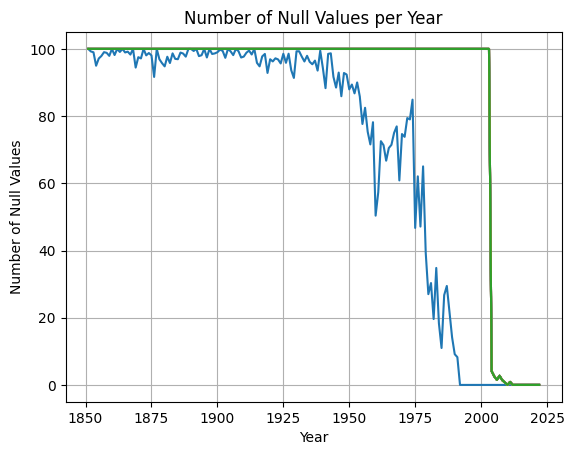

In [301]:
# Calculate proportion of missing values in highest percentage columns on NAN vlaues per year
missing_pressure_by_year = df.groupby('Year')[['Minimum_Pressure_in_millibars',
                                           'F34_kt_wind_radii_maximum_northeastern',
                                           'F34_kt_wind_radii_maximum_southeastern',
                                           'F34_kt_wind_radii_maximum_southwestern',
                                           'F34_kt_wind_radii_maximum_northwestern',
                                           'F50_kt_wind_radii_maximum_northeastern',
                                           'F50_kt_wind_radii_maximum_southeastern',
                                           'F50_kt_wind_radii_maximum_southwestern',
                                           'F50_kt_wind_radii_maximum_northwestern',
                                           'F64_kt_wind_radii_maximum_northeastern',
                                           'F64_kt_wind_radii_maximum_southeastern',
                                           'F64_kt_wind_radii_maximum_southwestern',
                                           'F64_kt_wind_radii_maximum_northwestern']].apply(lambda x: x.isna().mean() * 100)


for column in missing_pressure_by_year.columns:
    plt.plot(missing_pressure_by_year.index, missing_pressure_by_year[column], label=column)
plt.title('Number of Null Values per Year')
plt.xlabel('Year')
plt.ylabel('Number of Null Values')
plt.grid(True)
plt.show()

- Blue representing wind_radii_maximum (all of them are piled together- have the same missing values) --> the values sterted being recorded from 2004 
- Green representing Minimum_Pressure_in_millibars

In [302]:
# Restricting data to 1971 because measurements before are unreliable and have most of the null values
df_filtered = df[(df['Year'] >= 1971)]
df_filtered.isna().sum() / df_filtered.shape[0] * 100

Basin                                      0.000000
ATCF_cyclone_number_for_that_year          0.000000
Year_                                      0.000000
Name                                       0.000000
Year                                       0.000000
Month                                      0.000000
Day                                        0.000000
Hours_in_UTC                               0.000000
Minutes_in_UTC                             0.000000
Record_identifier                          0.000000
Record_identifier_desc                    97.556615
Status_of_system                           0.000000
Status_of_system_desc                      0.000000
Latitude                                   0.000000
Longitude                                  0.000000
Maximum_sustained_wind_in_knots            0.000000
Minimum_Pressure_in_millibars             14.000511
F34_kt_wind_radii_maximum_northeastern    56.691640
F34_kt_wind_radii_maximum_southeastern    56.691640
F34_kt_wind_

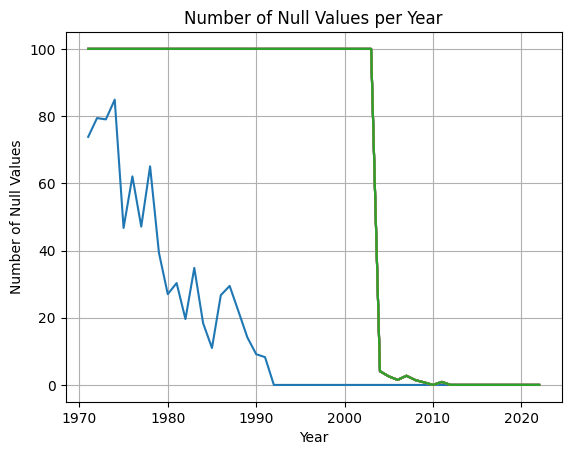

In [303]:
# Calculate proportion of missing values in 'min_pressure' column by year
missing_pressure_by_year = df_filtered.groupby('Year')[['Minimum_Pressure_in_millibars',
                                           'F34_kt_wind_radii_maximum_northeastern',
                                           'F34_kt_wind_radii_maximum_southeastern',
                                           'F34_kt_wind_radii_maximum_southwestern',
                                           'F34_kt_wind_radii_maximum_northwestern',
                                           'F50_kt_wind_radii_maximum_northeastern',
                                           'F50_kt_wind_radii_maximum_southeastern',
                                           'F50_kt_wind_radii_maximum_southwestern',
                                           'F50_kt_wind_radii_maximum_northwestern',
                                           'F64_kt_wind_radii_maximum_northeastern',
                                           'F64_kt_wind_radii_maximum_southeastern',
                                           'F64_kt_wind_radii_maximum_southwestern',
                                           'F64_kt_wind_radii_maximum_northwestern']].apply(lambda x: x.isna().mean() * 100)


for column in missing_pressure_by_year.columns:
    plt.plot(missing_pressure_by_year.index, missing_pressure_by_year[column], label=column)
plt.title('Number of Null Values per Year')
plt.xlabel('Year')
plt.ylabel('Number of Null Values')
plt.grid(True)
plt.show()

In [304]:
#Observe how many Landfall records are there, compared to other records
df_filtered['Record_identifier'].value_counts()

Record_identifier
     22918
L      507
I       29
P        9
S        8
T        8
C        5
W        4
R        3
G        1
Name: count, dtype: int64

In [305]:
# Impute minimum pressure missing values by dropping them, as it is only 3% missing
df_filtered.dropna(subset=['Minimum_Pressure_in_millibars'], inplace=True)

#Drop unnecessary data descriptions
df_filtered = df_filtered.drop(columns = ['Record_identifier_desc', 'Status_of_system_desc'])

# Check the percentage of missing values in the DataFrame
print(df_filtered.isna().sum() / df_filtered.shape[0] * 100)

Basin                                      0.000000
ATCF_cyclone_number_for_that_year          0.000000
Year_                                      0.000000
Name                                       0.000000
Year                                       0.000000
Month                                      0.000000
Day                                        0.000000
Hours_in_UTC                               0.000000
Minutes_in_UTC                             0.000000
Record_identifier                          0.000000
Status_of_system                           0.000000
Latitude                                   0.000000
Longitude                                  0.000000
Maximum_sustained_wind_in_knots            0.000000
Minimum_Pressure_in_millibars              0.000000
F34_kt_wind_radii_maximum_northeastern    49.641142
F34_kt_wind_radii_maximum_southeastern    49.641142
F34_kt_wind_radii_maximum_southwestern    49.641142
F34_kt_wind_radii_maximum_northwestern    49.641142
F50_kt_wind_

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/1701517422.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['Minimum_Pressure_in_millibars'], inplace=True)


In [306]:
# Filter 2004 data to be able to use the wind radii variables

df_2004 = df_filtered[(df_filtered['Year'] >= 2004)]
df_2004.isna().sum() / df_2004.shape[0] * 100

Basin                                     0.000000
ATCF_cyclone_number_for_that_year         0.000000
Year_                                     0.000000
Name                                      0.000000
Year                                      0.000000
Month                                     0.000000
Day                                       0.000000
Hours_in_UTC                              0.000000
Minutes_in_UTC                            0.000000
Record_identifier                         0.000000
Status_of_system                          0.000000
Latitude                                  0.000000
Longitude                                 0.000000
Maximum_sustained_wind_in_knots           0.000000
Minimum_Pressure_in_millibars             0.000000
F34_kt_wind_radii_maximum_northeastern    0.780183
F34_kt_wind_radii_maximum_southeastern    0.780183
F34_kt_wind_radii_maximum_southwestern    0.780183
F34_kt_wind_radii_maximum_northwestern    0.780183
F50_kt_wind_radii_maximum_north

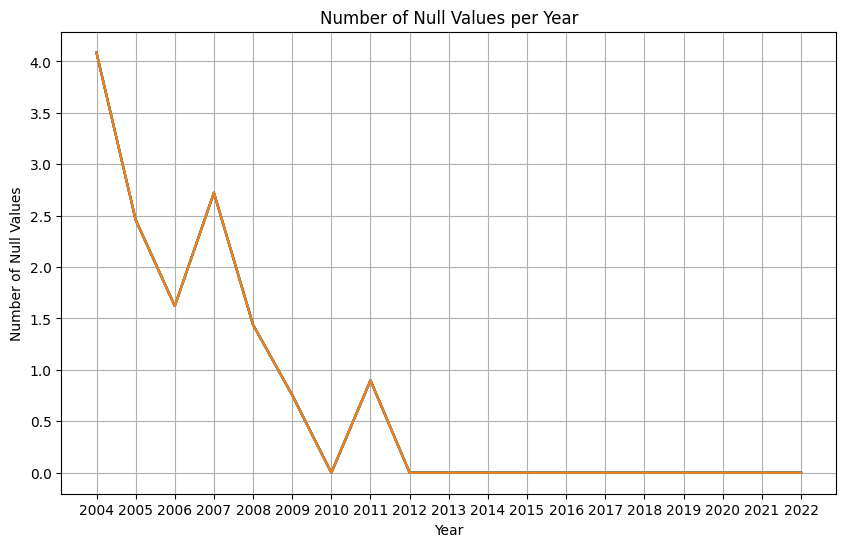

In [307]:
# Calculate proportion of missing values in 'min_pressure' column by year
missing_pressure_by_year = df_2004.groupby('Year_')[[
                                           'F34_kt_wind_radii_maximum_northeastern',
                                           'F34_kt_wind_radii_maximum_southeastern',
                                           'F34_kt_wind_radii_maximum_southwestern',
                                           'F34_kt_wind_radii_maximum_northwestern',
                                           'F50_kt_wind_radii_maximum_northeastern',
                                           'F50_kt_wind_radii_maximum_southeastern',
                                           'F50_kt_wind_radii_maximum_southwestern',
                                           'F50_kt_wind_radii_maximum_northwestern',
                                           'F64_kt_wind_radii_maximum_northeastern',
                                           'F64_kt_wind_radii_maximum_southeastern',
                                           'F64_kt_wind_radii_maximum_southwestern',
                                           'F64_kt_wind_radii_maximum_northwestern']].apply(lambda x: x.isna().mean() * 100)

plt.figure(figsize=(10, 6))
for column in missing_pressure_by_year.columns:
    plt.plot(missing_pressure_by_year.index, missing_pressure_by_year[column], label=column)
plt.title('Number of Null Values per Year')
plt.xlabel('Year')
plt.ylabel('Number of Null Values')
plt.grid(True)
plt.show()

In [308]:
#Use linear regression to impute wind radii missing values

from sklearn.linear_model import LinearRegression

# List of variables to impute
variables_to_impute = [
    'F34_kt_wind_radii_maximum_northeastern',
    'F34_kt_wind_radii_maximum_southeastern',
    'F34_kt_wind_radii_maximum_southwestern',
    'F34_kt_wind_radii_maximum_northwestern',
    'F50_kt_wind_radii_maximum_northeastern',
    'F50_kt_wind_radii_maximum_southeastern',
    'F50_kt_wind_radii_maximum_southwestern',
    'F50_kt_wind_radii_maximum_northwestern',
    'F64_kt_wind_radii_maximum_northeastern',
    'F64_kt_wind_radii_maximum_southeastern',
    'F64_kt_wind_radii_maximum_southwestern',
    'F64_kt_wind_radii_maximum_northwestern'
]

# Use other features as independent variables
X = df_2004[['Year_',
       'Month', 'Day', 'Hours_in_UTC','Latitude', 'Longitude',
       'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars']]  

# Loop through each variable to impute (wind radii) --> as the data has multiple wind radii variables with NaN values
for variable in variables_to_impute:
    y = df_2004[variable]  # Target variable/ dependent variable
    
    # Split data into two sets: one with missing values and one without
    missing_values_mask = y.isnull()  # Mask for missing values
    X_missing = X[missing_values_mask]  # Independent variables with missing values
    X_not_missing = X[~missing_values_mask]  # Independent variables without missing values
    y_not_missing = y[~missing_values_mask]  # Target variable without missing values

    # Fit a linear regression model using the data without missing values
    model = LinearRegression()
    model.fit(X_not_missing, y_not_missing)

    # Predict the missing values using the fitted model
    predicted_values = model.predict(X_missing)

    # Replace the missing values with the predicted values
    y[missing_values_mask] = predicted_values

    # Update the original DataFrame with the imputed values
    df_2004[variable] = y

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/1365277784.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[missing_values_mask] = predicted_values
/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/1365277784.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004[variable] = y
/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/1365277784.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [309]:
# check for missing values
df_2004.isna().sum() / df_2004.shape[0] * 100

Basin                                     0.0
ATCF_cyclone_number_for_that_year         0.0
Year_                                     0.0
Name                                      0.0
Year                                      0.0
Month                                     0.0
Day                                       0.0
Hours_in_UTC                              0.0
Minutes_in_UTC                            0.0
Record_identifier                         0.0
Status_of_system                          0.0
Latitude                                  0.0
Longitude                                 0.0
Maximum_sustained_wind_in_knots           0.0
Minimum_Pressure_in_millibars             0.0
F34_kt_wind_radii_maximum_northeastern    0.0
F34_kt_wind_radii_maximum_southeastern    0.0
F34_kt_wind_radii_maximum_southwestern    0.0
F34_kt_wind_radii_maximum_northwestern    0.0
F50_kt_wind_radii_maximum_northeastern    0.0
F50_kt_wind_radii_maximum_southeastern    0.0
F50_kt_wind_radii_maximum_southwes

# Feature Engineering

In [418]:
# variable that identifies the number of hurricane for each year (unique id)
# concatenate ATCF identifier and the Year -> unique ID for every cyclone

df_filtered['hurricane_id'] = df_filtered['ATCF_cyclone_number_for_that_year'].astype(str) +'-'+ df_filtered['Year_'].astype(str)
df_filtered['hurricane_id'].value_counts() #Multiple appearances of the same cyclone depending on how long they lasted

hurricane_id
14-2012    96
12-2002    90
13-2018    89
17-2020    88
03-2000    87
           ..
19-1971     3
07-1974     2
12-1974     2
02-1974     2
05-1974     1
Name: count, Length: 714, dtype: int64

Creating 3 new columns:
1. Estimate `category` variable from wind speed based on Saffir-Simpson storm category
2. Calculate the `ts_diameter` from extent of 34 kt wind radii maximum extent in each quadrant 
3. Calculate `hu_diameter` from extent of 64 kt wind radii maximum extent in each quadrant

In [311]:
# Calculate the average radius of the tropical storm
average_radius = (df_2004['F34_kt_wind_radii_maximum_northeastern'] +
                 df_2004['F34_kt_wind_radii_maximum_southeastern'] +
                 df_2004['F34_kt_wind_radii_maximum_northwestern'] +
                 df_2004['F34_kt_wind_radii_maximum_southwestern']) / 4

# Calculate the diameter by multiplying the average radius by 2
df_2004['ts_diameter'] = average_radius * 2

average_radius_hu = ((df_2004['F64_kt_wind_radii_maximum_northeastern']) +
                                 (df_2004['F64_kt_wind_radii_maximum_southeastern']) +
                                 (df_2004['F64_kt_wind_radii_maximum_northwestern']) +
                                 (df_2004['F64_kt_wind_radii_maximum_southwestern'])) / 4


# Calculate the diameter by multiplying the average radius by 2
df_2004['hu_diameter'] = average_radius_hu * 2

# ts_diameter represents the diameter of the area experiencing hurricane strength winds
# hu_diameter represents the diameter of the hurricane

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/2605955799.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['ts_diameter'] = average_radius * 2
/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/2605955799.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['hu_diameter'] = average_radius_hu * 2


In [312]:
# Wind speed thresholds for each Saffir-Simpson category
category_thresholds = {
    1: 64,    # Category 1: 64-82 knots
    2: 83,    # Category 2: 83-95 knots
    3: 96,   # Category 3: 96-112 knots
    4: 113,   # Category 4: 113-136 knots
    5: 137}    # Category 5: 137 knots or higher

# Estimate Saffir-Simpson storm category based on maximum sustained wind speed
# Use pd.cut() to categorize wind speeds into Saffir-Simpson categories
# Assign each wind speed to the corresponding category index
df_2004['Category'] = pd.cut(
    df_2004['Maximum_sustained_wind_in_knots'],
    bins=[0] + list(category_thresholds.values()),labels=False, right=False)

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/2002659404.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['Category'] = pd.cut(


In [313]:
# Repeat for dataset with larger year range, 1971+

# Wind speed thresholds for each Saffir-Simpson category
category_thresholds = {
    1: 64,    # Category 1: 64-82 knots
    2: 83,    # Category 2: 83-95 knots
    3: 96,   # Category 3: 96-112 knots
    4: 113,   # Category 4: 113-136 knots
    5: 137}    # Category 5: 137 knots or higher

# Estimate Saffir-Simpson storm category based on maximum sustained wind speed
# Use pd.cut() to categorize wind speeds into Saffir-Simpson categories
# Assign each wind speed to the corresponding category index
df_filtered['Category'] = pd.cut(
    df_filtered['Maximum_sustained_wind_in_knots'],
    bins=[0] + list(category_thresholds.values()),labels=False, right=False)

df_filtered.dropna(subset=['Category'], inplace=True)
df_filtered.isna().sum() / df_2004.shape[0] * 100

Basin                                      0.000000
ATCF_cyclone_number_for_that_year          0.000000
Year_                                      0.000000
Name                                       0.000000
Year                                       0.000000
Month                                      0.000000
Day                                        0.000000
Hours_in_UTC                               0.000000
Minutes_in_UTC                             0.000000
Record_identifier                          0.000000
Status_of_system                           0.000000
Latitude                                   0.000000
Longitude                                  0.000000
Maximum_sustained_wind_in_knots            0.000000
Minimum_Pressure_in_millibars              0.000000
F34_kt_wind_radii_maximum_northeastern    97.298615
F34_kt_wind_radii_maximum_southeastern    97.298615
F34_kt_wind_radii_maximum_southwestern    97.298615
F34_kt_wind_radii_maximum_northwestern    97.298615
F50_kt_wind_

In [314]:
# Check for missing values
df_2004.dropna(subset=['Category'], inplace=True)
df_2004.isna().sum() / df_2004.shape[0] * 100

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/547590211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004.dropna(subset=['Category'], inplace=True)


Basin                                     0.0
ATCF_cyclone_number_for_that_year         0.0
Year_                                     0.0
Name                                      0.0
Year                                      0.0
Month                                     0.0
Day                                       0.0
Hours_in_UTC                              0.0
Minutes_in_UTC                            0.0
Record_identifier                         0.0
Status_of_system                          0.0
Latitude                                  0.0
Longitude                                 0.0
Maximum_sustained_wind_in_knots           0.0
Minimum_Pressure_in_millibars             0.0
F34_kt_wind_radii_maximum_northeastern    0.0
F34_kt_wind_radii_maximum_southeastern    0.0
F34_kt_wind_radii_maximum_southwestern    0.0
F34_kt_wind_radii_maximum_northwestern    0.0
F50_kt_wind_radii_maximum_northeastern    0.0
F50_kt_wind_radii_maximum_southeastern    0.0
F50_kt_wind_radii_maximum_southwes

In [315]:
# Change to datetimme 
df_2004['Date'] = pd.to_datetime(df_2004[['Year', 'Month', 'Day']])

/var/folders/8m/xsqm400s0tqdzyxl1w75z6080000gn/T/ipykernel_21914/1272317282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2004['Date'] = pd.to_datetime(df_2004[['Year', 'Month', 'Day']])


In [319]:
# Create datetime column with the hours included 

# Ensure leading zeros where necessary
df_filtered['Hours_in_UTC'] = df_filtered['Hours_in_UTC'].apply(lambda x: f"{x:04d}")

# Add a colon between hours and minutes
df_filtered['Hours_in_UTC'] = df_filtered['Hours_in_UTC'].str[:2] + ':' + df_filtered['Hours_in_UTC'].str[2:]


In [320]:
df_filtered['Hours_in_UTC']

30489    18:00
30492    12:00
30493    18:00
30494    00:00
30495    06:00
         ...  
53971    19:00
53972    00:00
53973    06:00
53974    12:00
53975    18:00
Name: Hours_in_UTC, Length: 20086, dtype: object

In [322]:
# Ensure that 'Year', 'Month', and 'Day' columns are in the proper string format
# with leading zeros where necessary for single digit months and days.
df_filtered['Year'] = df_filtered['Year'].astype(str).str.zfill(4)
df_filtered['Month'] = df_filtered['Month'].astype(str).str.zfill(2)
df_filtered['Day'] = df_filtered['Day'].astype(str).str.zfill(2)

In [323]:
df_filtered

,Basin,ATCF_cyclone_number_for_that_year,Year_,Name,Year,Month,Day,Hours_in_UTC,Minutes_in_UTC,Record_identifier,Status_of_system,Latitude,Longitude,Maximum_sustained_wind_in_knots,Minimum_Pressure_in_millibars,F34_kt_wind_radii_maximum_northeastern,F34_kt_wind_radii_maximum_southeastern,F34_kt_wind_radii_maximum_southwestern,F34_kt_wind_radii_maximum_northwestern,F50_kt_wind_radii_maximum_northeastern,F50_kt_wind_radii_maximum_southeastern,F50_kt_wind_radii_maximum_southwestern,F50_kt_wind_radii_maximum_northwestern,F64_kt_wind_radii_maximum_northeastern,F64_kt_wind_radii_maximum_southeastern,F64_kt_wind_radii_maximum_southwestern,F64_kt_wind_radii_maximum_northwestern,hurricane_id,Category
30489,AL,01,1971,ARLENE,1971,07,05,18:00,80,,TS,36.7,-72.9,45.0,1001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-1971,0.0
30492,AL,01,1971,ARLENE,1971,07,06,12:00,20,,TS,39.6,-68.3,50.0,1003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-1971,0.0
30493,AL,01,1971,ARLENE,1971,07,06,18:00,80,,TS,40.7,-65.9,55.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-1971,0.0
30494,AL,01,1971,ARLENE,1971,07,07,00:00,0,,TS,41.8,-63.0,50.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-1971,0.0
30495,AL,01,1971,ARLENE,1971,07,07,06:00,60,,TS,43.1,-59.5,45.0,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-1971,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53971,AL,17,2022,NICOLE,2022,11,10,19:00,90,L,TS,29.2,-83.0,40.0,989.0,200.0,60.0,100.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17-2022,0.0
53972,AL,17,2022,NICOLE,2022,11,11,00:00,0,L,TS,30.1,-84.0,35.0,992.0,200.0,60.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17-2022,0.0
53973,AL,17,2022,NICOLE,2022,11,11,06:00,60,,TD,31.2,-84.6,30.0,996.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17-2022,0.0
53974,AL,17,2022,NICOLE,2022,11,11,12:00,20,,TD,33.2,-84.6,25.0,999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17-2022,0.0


In [324]:
df_filtered['DateTime'] = df_filtered['Year']+ '-'+df_filtered['Month']+'-'+ df_filtered['Day']+' '+df_filtered['Hours_in_UTC']
df_filtered['DateTime']

30489    1971-07-05 18:00
30492    1971-07-06 12:00
30493    1971-07-06 18:00
30494    1971-07-07 00:00
30495    1971-07-07 06:00
               ...       
53971    2022-11-10 19:00
53972    2022-11-11 00:00
53973    2022-11-11 06:00
53974    2022-11-11 12:00
53975    2022-11-11 18:00
Name: DateTime, Length: 20086, dtype: object

In [325]:
df_filtered['DateTime'] = pd.to_datetime(df_filtered['DateTime'])
df_filtered['DateTime']

30489   1971-07-05 18:00:00
30492   1971-07-06 12:00:00
30493   1971-07-06 18:00:00
30494   1971-07-07 00:00:00
30495   1971-07-07 06:00:00
                ...        
53971   2022-11-10 19:00:00
53972   2022-11-11 00:00:00
53973   2022-11-11 06:00:00
53974   2022-11-11 12:00:00
53975   2022-11-11 18:00:00
Name: DateTime, Length: 20086, dtype: datetime64[ns]

In [346]:
# one-hot encode landfall variable 
#landfall = 1 others = 0 

# One-hot encode the 'Record_identifier' variable
one_hot_encoded = pd.get_dummies(df_filtered['Record_identifier'], prefix='Record_identifier', drop_first = True)

# Add the one-hot encoded column back to the original DataFrame
df_encoded = pd.concat([df_filtered, one_hot_encoded], axis=1)

In [347]:
df_encoded.columns

Index(['Basin', 'ATCF_cyclone_number_for_that_year', 'Year_', 'Name', 'Year',
       'Month', 'Day', 'Hours_in_UTC', 'Minutes_in_UTC', 'Record_identifier',
       'Status_of_system', 'Latitude', 'Longitude',
       'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars',
       'F34_kt_wind_radii_maximum_northeastern',
       'F34_kt_wind_radii_maximum_southeastern',
       'F34_kt_wind_radii_maximum_southwestern',
       'F34_kt_wind_radii_maximum_northwestern',
       'F50_kt_wind_radii_maximum_northeastern',
       'F50_kt_wind_radii_maximum_southeastern',
       'F50_kt_wind_radii_maximum_southwestern',
       'F50_kt_wind_radii_maximum_northwestern',
       'F64_kt_wind_radii_maximum_northeastern',
       'F64_kt_wind_radii_maximum_southeastern',
       'F64_kt_wind_radii_maximum_southwestern',
       'F64_kt_wind_radii_maximum_northwestern', 'hurricane_id', 'Category',
       'DateTime', 'Record_identifier_C', 'Record_identifier_G',
       'Record_identifier_I', 'Recor

In [348]:
#drop unnecessary columns from the one hot encoding as I'm only interested in L=1 or L=0 (binary)

df_encoded = df_encoded.drop(columns = ['Record_identifier_C', 'Record_identifier_G', 'Record_identifier_I', 'Record_identifier_P', 'Record_identifier_R',
       'Record_identifier_S', 'Record_identifier_T', 'Record_identifier_W'])

Engineer Distance from Land feature

In [424]:
# Filter the dataset for entries where 'Record_identifier_L' equals 1
landfall_entries = df_encoded[df_encoded['Record_identifier_L'] == 1]

# Extract 'Latitude' and 'Longitude' for these entries
landfall_coordinates = landfall_entries[['Latitude', 'Longitude']]

# Convert latitudes and longitudes from degrees to radians
landfall_coordinates_rad = np.radians(landfall_coordinates)

In [425]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance between two points using haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers

    # Convert latitude and longitude from degrees to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Calculate differences in latitude and longitude
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Calculate distance using haversine formula
    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [426]:
# Iterate through cyclone entries and calculate distance to nearest landfall point
nearest_landfall_distances = []

for index, cyclone_entry in df_encoded.iterrows():
    if cyclone_entry['Record_identifier_L'] == 0:  # Check if it's a cyclone entry without landfall
        cyclone_lat = cyclone_entry['Latitude']
        cyclone_lon = cyclone_entry['Longitude']
        
        # Initialize minimum distance to a large value
        min_distance = float('inf')
        
        # Calculate distance to each landfall point and keep the minimum
        for landfall_index, landfall_point in landfall_coordinates.iterrows():
            landfall_lat = landfall_point['Latitude']
            landfall_lon = landfall_point['Longitude']
            distance = haversine(cyclone_lat, cyclone_lon, landfall_lat, landfall_lon)
            min_distance = min(min_distance, distance)
        
        # Append the minimum distance to the list
        nearest_landfall_distances.append(min_distance)
    else:
        # If it's a landfall entry, append 0 as it's already at land
        nearest_landfall_distances.append(0)

# Add the nearest landfall distance as a new column in the dataset
df_encoded['Nearest_landfall_distance'] = nearest_landfall_distances

In [352]:
# Sort the dataframe by datetime to ensure the observations are in chronological order
df_encoded.sort_values(by='DateTime', inplace=True)

# Calculate the time difference between consecutive observations (in hours)
df_encoded['Time_diff_hours'] = df_encoded['DateTime'].diff().dt.total_seconds() / 3600

# Calculate the change in maximum sustained wind speed over the time difference
df_encoded['Max_wind_speed_change'] = df_encoded['Maximum_sustained_wind_in_knots'].diff()

# Calculate the intensification rate (change in wind speed per hour)
df_encoded['Intensification_rate'] = df_encoded['Max_wind_speed_change'] / df_encoded['Time_diff_hours']

# Drop the NaN values resulting from the first row's calculation
df_encoded.dropna(subset=['Intensification_rate'], inplace=True)

In [355]:
# Check if the dataset contains infinities
if np.isinf(df_encoded['Intensification_rate']).values.any():
    print("Data contains infinity")
    df_encoded['Intensification_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf with NaN


In [361]:
# Handle NaN values with mean

from sklearn.impute import SimpleImputer

# Use imputation to handle NaN values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df_encoded['Intensification_rate'] = imputer.fit_transform(df_encoded[['Intensification_rate']])

## Exploratory Data Analysis (EDA):

Conduct EDA to understand the underlying patterns in your data, including trends, seasonality, and correlations between variables.

In [363]:
df_filtered['Status_of_system'].value_counts()

Status_of_system
TS    6954
HU    4816
TD    3617
EX    2237
LO    1483
SS     467
SD     230
DB     171
WV     111
Name: count, dtype: int64

Text(0, 0.5, 'Count')

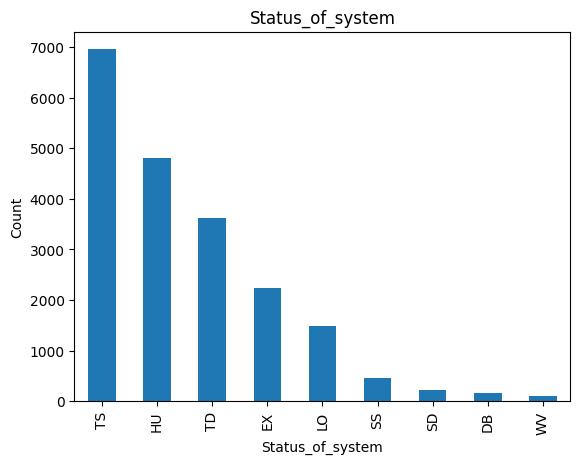

In [364]:
#plt.figure(figsize=(10, 6)) 
ax = df_filtered['Status_of_system'].value_counts().plot(kind='bar', title='Status_of_system')
ax.set_xlabel('Status_of_system')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

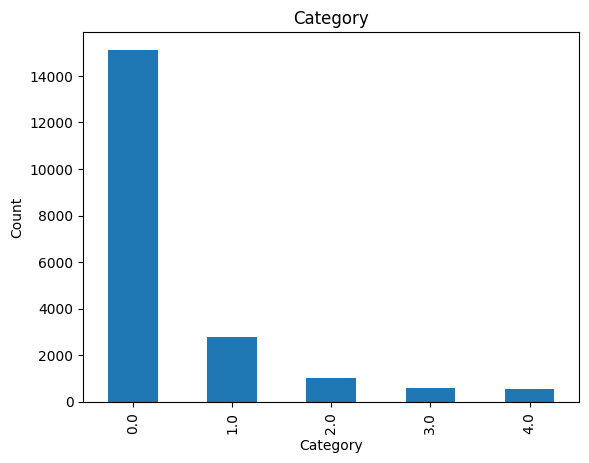

In [366]:
#plt.figure(figsize=(10, 6)) 
ax = df_filtered['Category'].value_counts().plot(kind='bar', title='Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')

Text(0.5, 0, 'Minimum_Pressure_in_millibars')

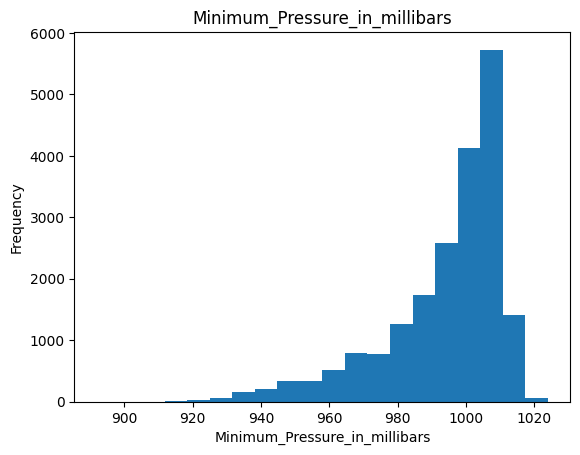

In [367]:
#plt.figure(figsize=(10, 6)) 
ax = df_filtered['Minimum_Pressure_in_millibars'].plot(kind='hist',
                          bins=20,
                          title='Minimum_Pressure_in_millibars')
ax.set_xlabel('Minimum_Pressure_in_millibars')

Text(0.5, 0, 'Maximum_sustained_wind_in_knots')

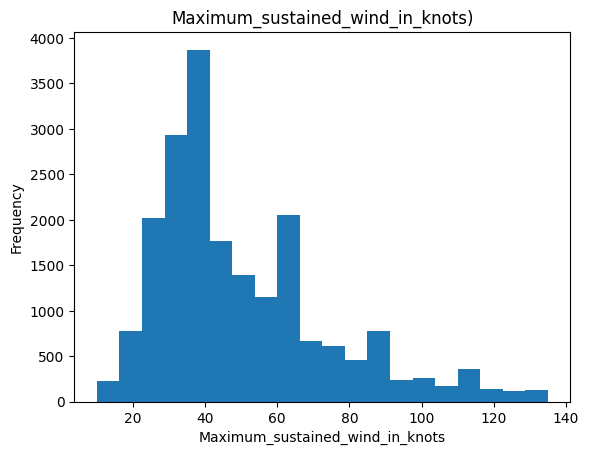

In [368]:
#plt.figure(figsize=(10, 6)) 
ax = df_filtered['Maximum_sustained_wind_in_knots'].plot(kind='hist',
                          bins=20,
                          title='Maximum_sustained_wind_in_knots)')
ax.set_xlabel('Maximum_sustained_wind_in_knots')

#Not continous

Text(0, 0.5, 'Count')

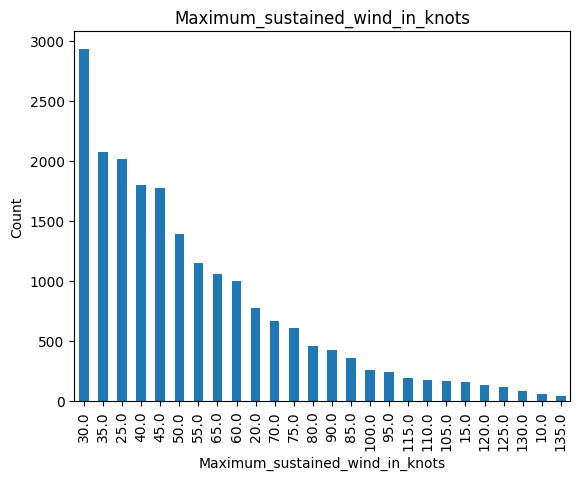

In [369]:
# Create a bar plot of hte max wind as it seems to be discrete data

ax = df_filtered['Maximum_sustained_wind_in_knots'].value_counts().plot(kind='bar', title='Maximum_sustained_wind_in_knots')
ax.set_xlabel('Maximum_sustained_wind_in_knots')
ax.set_ylabel('Count')

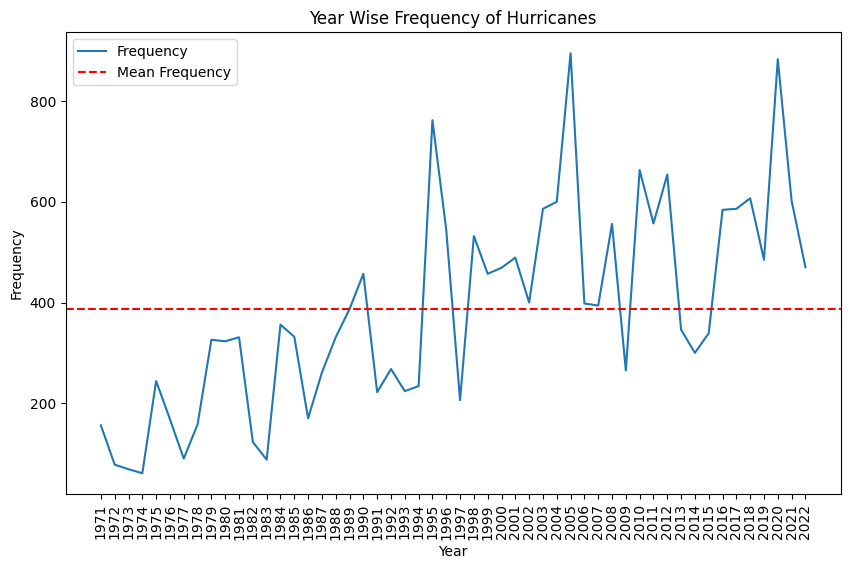

In [371]:
# Frequency of Hurricanes per year

hurricanes = df_filtered.groupby('Year').count()
plt.figure(figsize= (10,6))
sns.lineplot(x = hurricanes.index , y = 'Month' , data = hurricanes , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes')

# Adding a horizontal line at the mean 
mean_frequency = hurricanes['Month'].mean()
plt.axhline(mean_frequency, color='red', linestyle='--', label='Mean Frequency')

plt.legend()
plt.xticks(rotation=90)
plt.show()

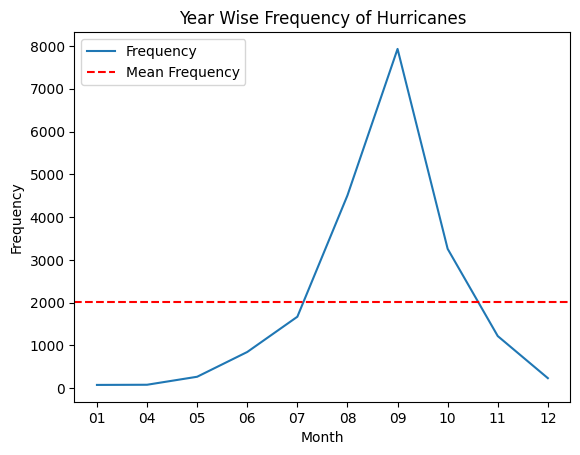

In [372]:
# Frequency of Hurricanes per month

hurricanes = df_filtered.groupby('Month').count()
#plt.figure(figsize= (12,8))
sns.lineplot(x = hurricanes.index , y = 'Hours_in_UTC' , data = hurricanes , label = 'Frequency')
plt.ylabel('Frequency')
plt.title('Year Wise Frequency of Hurricanes')

# Adding a horizontal line at the mean
mean_frequency = hurricanes['Hours_in_UTC'].mean()
plt.axhline(mean_frequency, color='red', linestyle='--', label='Mean Frequency')
plt.legend()
plt.show()

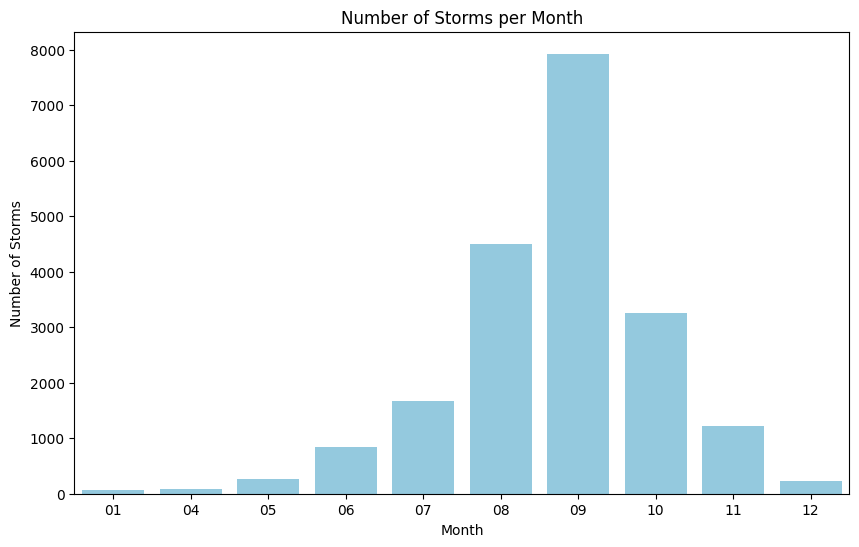

In [373]:
# Count the number of storms per month
storms_per_month = df_filtered.groupby('Month').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=storms_per_month.index, y=storms_per_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Storms')
plt.title('Number of Storms per Month')
plt.show()

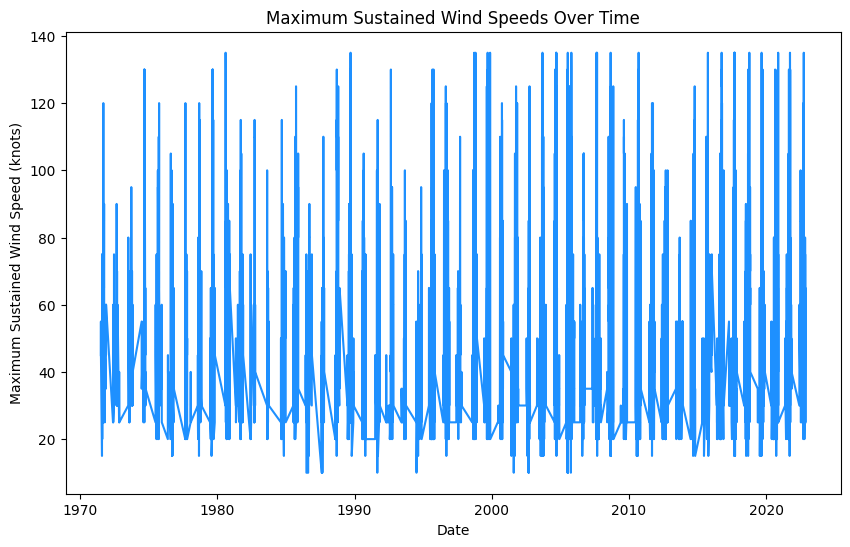

In [376]:
# Sort Data by Time
df_filtered.sort_values(by='DateTime', inplace=True)

# Plot Time Series
plt.figure(figsize=(10, 6))
plt.plot(df_filtered['DateTime'], df_filtered['Maximum_sustained_wind_in_knots'],color='dodgerblue')
plt.title('Maximum Sustained Wind Speeds Over Time')
plt.xlabel('Date')
plt.ylabel('Maximum Sustained Wind Speed (knots)')
plt.show()


### Statistical analysis on relevant features

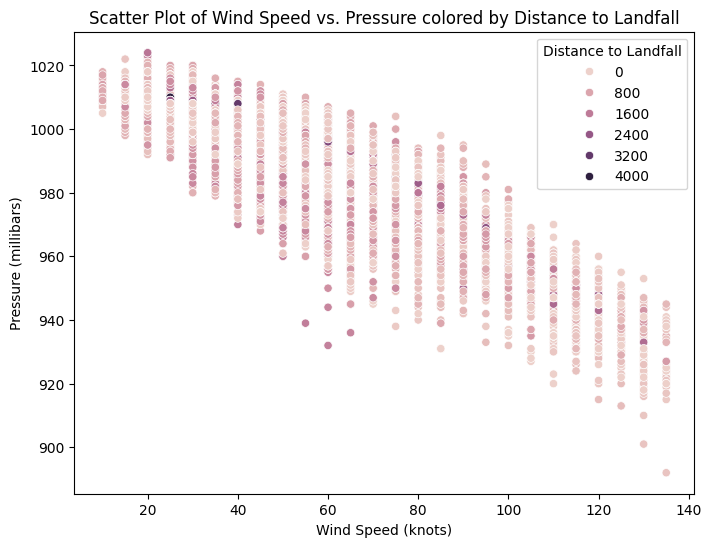

Pearson correlation between wind speed and pressure: -0.9202358056956512
T-test p-value for difference in wind speed between cyclones with and without landfall: 6.667108848781304e-45
                                OLS Regression Results                               
Dep. Variable:     Nearest_landfall_distance   R-squared:                       0.013
Model:                                   OLS   Adj. R-squared:                  0.013
Method:                        Least Squares   F-statistic:                     125.7
Date:                       Wed, 08 May 2024   Prob (F-statistic):           5.89e-55
Time:                               17:33:37   Log-Likelihood:            -1.5763e+05
No. Observations:                      19671   AIC:                         3.153e+05
Df Residuals:                          19668   BIC:                         3.153e+05
Df Model:                                  2                                         
Covariance Type:                   nonrobus

In [377]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from statsmodels.formula.api import ols



# Scatter plot of wind speed, pressure, and distance to landfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Maximum_sustained_wind_in_knots', y='Minimum_Pressure_in_millibars', hue='Nearest_landfall_distance', data=df_encoded)
plt.title('Scatter Plot of Wind Speed vs. Pressure colored by Distance to Landfall')
plt.xlabel('Wind Speed (knots)')
plt.ylabel('Pressure (millibars)')
plt.legend(title='Distance to Landfall')
plt.show()

# Statistical Analysis

# Correlation analysis between variables
corr_wind_speed_pressure, _ = pearsonr(df_encoded['Maximum_sustained_wind_in_knots'], df_encoded['Minimum_Pressure_in_millibars'])
print(f"Pearson correlation between wind speed and pressure: {corr_wind_speed_pressure}")

# T-test to compare wind speed between cyclones that made landfall and those that didn't
landfall_wind_speed = df_encoded[df_encoded['Nearest_landfall_distance'] == 0]['Maximum_sustained_wind_in_knots']
no_landfall_wind_speed = df_encoded[df_encoded['Nearest_landfall_distance'] != 0]['Maximum_sustained_wind_in_knots']
t_stat, p_value = ttest_ind(landfall_wind_speed, no_landfall_wind_speed)
print(f"T-test p-value for difference in wind speed between cyclones with and without landfall: {p_value}")

# Regression analysis to model the impact of variables on landfall probability
model = ols("Nearest_landfall_distance ~ Maximum_sustained_wind_in_knots + Minimum_Pressure_in_millibars", data=df_encoded).fit()
print(model.summary())

# METHOD

# Modeling the probability of landfall

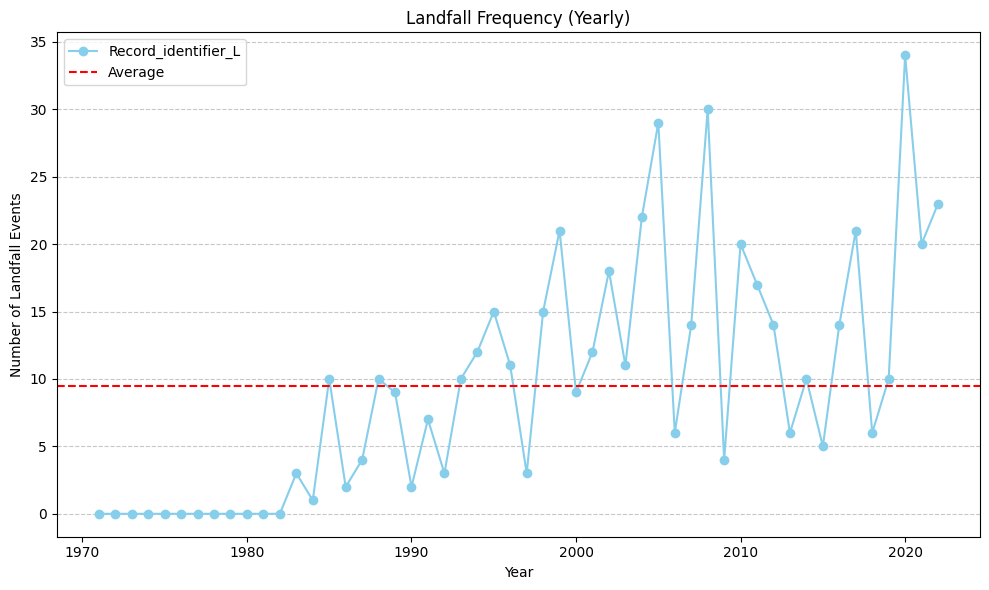

In [378]:
# Visualize Landfall frequncy in time series plot

import matplotlib.pyplot as plt

# Group the data by year and count the number of landfall events per year
landfall_frequency_yearly = df_encoded.groupby(df_encoded['DateTime'].dt.year)['Record_identifier_L'].sum()

# Calculate the average number of landfall events per year
average_landfall_per_year = landfall_frequency_yearly.mean()

# Plot the landfall frequency over time (yearly)
plt.figure(figsize=(10, 6))
landfall_frequency_yearly.plot(kind='line', marker='o', color='skyblue')
plt.title('Landfall Frequency (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Landfall Events')
plt.axhline(y=average_landfall_per_year, color='red', linestyle='--', label='Average')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Data Splitting

In [380]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report

In [381]:
# Select features, target variable andd 80-20 split
X = df_encoded[['Year',
       'Month', 'Day', 'Latitude', 'Longitude',
       'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars','Category']]
y = df_encoded['Record_identifier_L'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [382]:
#check for potential imbalance in class
df_encoded['Record_identifier_L'].value_counts()

Record_identifier_L
False    19178
True       493
Name: count, dtype: int64

### Model Training

In [383]:
# Training logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("Classification Report:")
print(report_lr)


Logistic Regression Model:
Accuracy: 0.9738
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99      3832
        True       0.00      0.00      0.00       103

    accuracy                           0.97      3935
   macro avg       0.49      0.50      0.49      3935
weighted avg       0.95      0.97      0.96      3935



/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Prec

In [384]:
# Training decision tree Model with default parameters

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
tree_model = DecisionTreeClassifier(max_depth= 10)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model:")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)


Decision Tree Model:
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      3832
        True       0.20      0.12      0.15       103

    accuracy                           0.96      3935
   macro avg       0.59      0.55      0.57      3935
weighted avg       0.96      0.96      0.96      3935



In [385]:
# Training decision tree Model looking to optimize parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Initialize the Grid Search model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_tree_model = grid_search.best_estimator_

# Make predictions
y_pred_dt = best_tree_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)


Decision Tree Model after Hyperparameter Tuning:
Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 7}
Accuracy: 0.9698
Classification Report:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98      3832
        True       0.30      0.12      0.17       103

    accuracy                           0.97      3935
   macro avg       0.64      0.55      0.58      3935
weighted avg       0.96      0.97      0.96      3935



In [386]:
# Training Random Forest Model looking to optimize parameters

from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],  # List some reasonable values
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Grid Search model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)



Random Forest Model after Hyperparameter Tuning:
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.9675
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      3832
        True       0.14      0.05      0.07       103

    accuracy                           0.97      3935
   macro avg       0.56      0.52      0.53      3935
weighted avg       0.95      0.97      0.96      3935



In [387]:
# Training Random Forest Model by manually adjusting parameters

# Initialize Random Forest model
rf_model = RandomForestClassifier(max_depth= 30, n_estimators = 200)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)

Random Forest Model:
Accuracy: 0.9657
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98      3832
        True       0.12      0.05      0.07       103

    accuracy                           0.97      3935
   macro avg       0.55      0.52      0.53      3935
weighted avg       0.95      0.97      0.96      3935



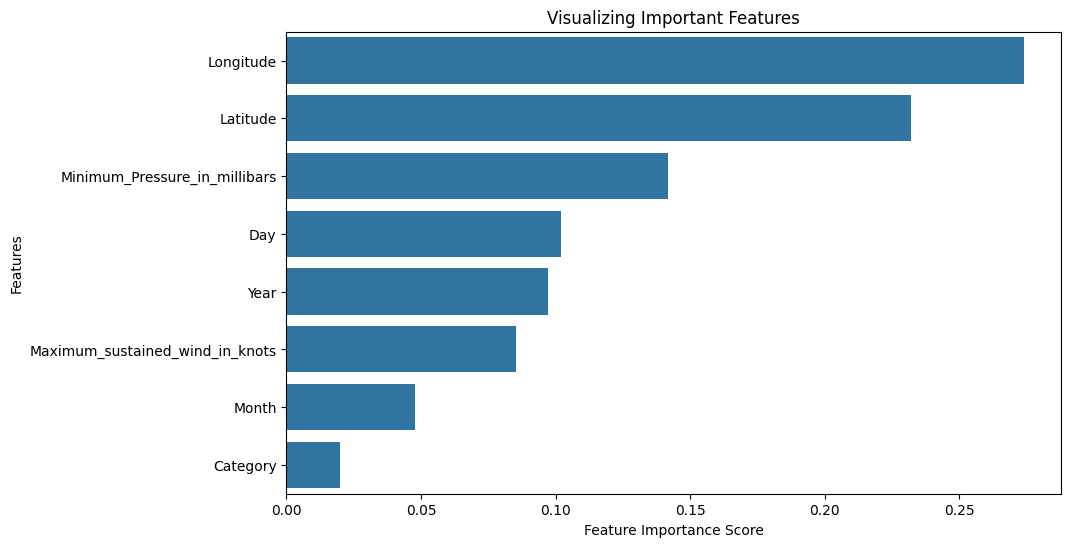

In [388]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


Evaluation of Logistic Regression Model:
Cross-Validation Scores: [0.97458704 0.97458704 0.97331639 0.97331639 0.97331639]
Mean Cross-Validation Accuracy: 0.9738246505717916
Accuracy: 0.9738246505717916
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

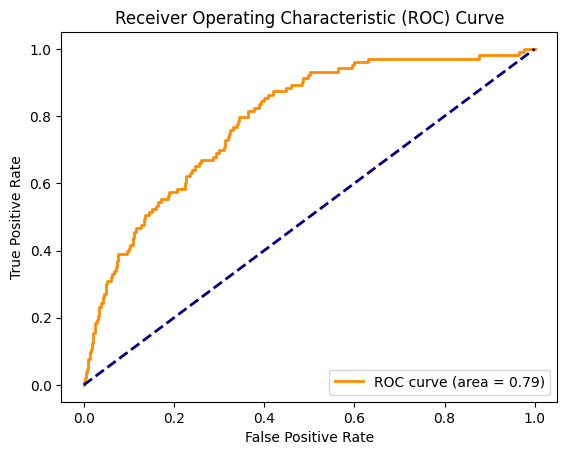


Evaluation of Decision Tree Model:
Cross-Validation Scores: [0.95552732 0.96950445 0.94663278 0.95552732 0.95044473]
Mean Cross-Validation Accuracy: 0.9555273189326556
Accuracy: 0.9649301143583228
Precision: 0.2033898305084746
Recall: 0.11650485436893204
F1 Score: 0.14814814814814814


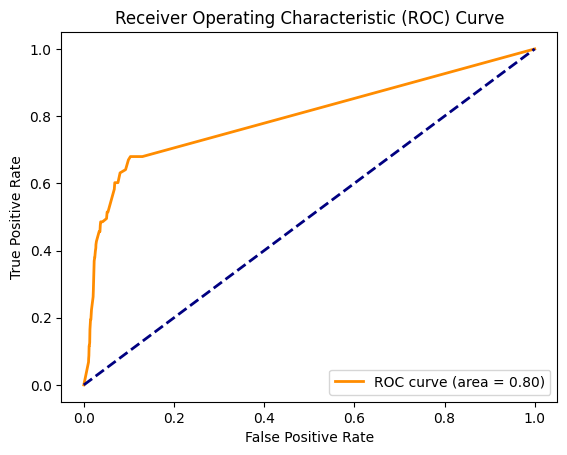


Evaluation of Random Forest Model:
Cross-Validation Scores: [0.9707751 0.9707751 0.9682338 0.9707751 0.9682338]
Mean Cross-Validation Accuracy: 0.9697585768742059
Accuracy: 0.96569250317662
Precision: 0.11904761904761904
Recall: 0.04854368932038835
F1 Score: 0.06896551724137931


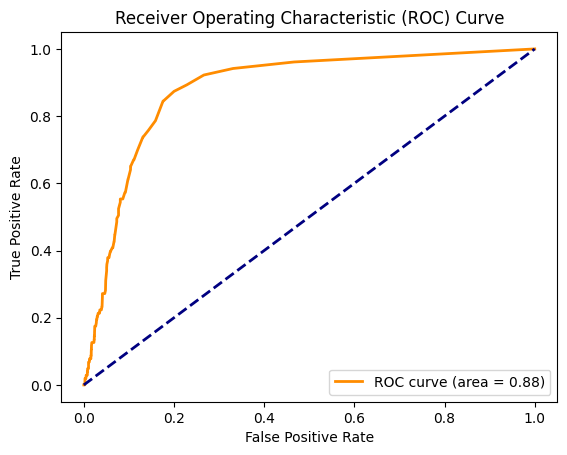

In [390]:
# Further Evaluate the models and vizualize performance with ROC 

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to evaluate the model
def evaluate_model(model, X, y):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

    # Make predictions
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot ROC curve
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# Evaluate Logistic Regression model
print("\nEvaluation of Logistic Regression Model:")
evaluate_model(logistic_model, X_test, y_test)

# Evaluate Decision Tree model
print("\nEvaluation of Decision Tree Model:")
evaluate_model(tree_model, X_test, y_test)

# Evaluate Random Forest model
print("\nEvaluation of Random Forest Model:")
evaluate_model(rf_model, X_test, y_test)


## Fix Imbalance of classes

1. Feature Engineering
- Add engineered features: Distance to Land, Intensificcation Rate

In [392]:
# Resplit modelss with new features

X = df_encoded[['Year',
       'Month', 'Day', 'Latitude', 'Longitude',
       'Maximum_sustained_wind_in_knots', 'Minimum_Pressure_in_millibars','Category', 'Nearest_landfall_distance','Intensification_rate']]
y = df_encoded['Record_identifier_L'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [393]:
#Retrain models with new feautres

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Model with Engineered Features:")
print(f"Accuracy: {accuracy_lr:.4f}")
print("Classification Report:")
print(report_lr)

Logistic Regression Model with Engineered Features:
Accuracy: 0.9987
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3832
        True       0.95      1.00      0.98       103

    accuracy                           1.00      3935
   macro avg       0.98      1.00      0.99      3935
weighted avg       1.00      1.00      1.00      3935



/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [394]:
# Train the model with engineered features, with default parameters
dt_eng_feautres = DecisionTreeClassifier()
dt_eng_feautres.fit(X_train, y_train)

# Make predictions
y_pred_dt_eng = dt_eng_feautres.predict(X_test)

# Evaluate the model
accuracy_dt_eng = accuracy_score(y_test, y_pred_dt_eng)
report_dt_eng = classification_report(y_test, y_pred_dt_eng)

print("\nDecision Tree Model with Engineered Features:")
print(f"Accuracy: {accuracy_dt_eng:.4f}")
print("Classification Report:")
print(report_dt_eng)


Decision Tree Model with Engineered Features:
Accuracy: 0.9972
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3832
        True       0.96      0.93      0.95       103

    accuracy                           1.00      3935
   macro avg       0.98      0.97      0.97      3935
weighted avg       1.00      1.00      1.00      3935



In [407]:
# Training Decision tree with best possible parameters

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 10),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 5)
}

# Initialize the Grid Search model
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_eng_feautres = grid_search.best_estimator_

# Make predictions
y_pred_dt = best_dt_eng_feautres.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Model after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy_dt:.4f}")
print("Classification Report:")
print(report_dt)

Decision Tree Model after Hyperparameter Tuning:
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9987
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3832
        True       0.95      1.00      0.98       103

    accuracy                           1.00      3935
   macro avg       0.98      1.00      0.99      3935
weighted avg       1.00      1.00      1.00      3935



In [396]:
# Train the model with engineered features, with default parameters

rf_eng_feautres = RandomForestClassifier()
rf_eng_feautres.fit(X_train, y_train)

# Make predictions
y_pred_rf_eng = rf_eng_feautres.predict(X_test)

# Evaluate the model
accuracy_rf_eng = accuracy_score(y_test, y_pred_rf_eng)
report_rf_eng = classification_report(y_test, y_pred_rf_eng)

print("\nRandom Forest Classifier with Engineered Features:")
print(f"Accuracy: {accuracy_rf_eng:.4f}")
print("Classification Report:")
print(report_rf_eng)


Random Forest Classifier with Engineered Features:
Accuracy: 0.9977
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3832
        True       0.95      0.96      0.96       103

    accuracy                           1.00      3935
   macro avg       0.98      0.98      0.98      3935
weighted avg       1.00      1.00      1.00      3935



In [409]:
# Training Random Forest with best possible parameters

# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],  # List some reasonable values
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize the Grid Search model
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_eng_feautres = grid_search_rf.best_estimator_

# Make predictions
y_pred_rf = best_rf_eng_feautres.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Model after Hyperparameter Tuning:")
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Accuracy: {accuracy_rf:.4f}")
print("Classification Report:")
print(report_rf)

Random Forest Model after Hyperparameter Tuning:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9987
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3832
        True       0.95      1.00      0.98       103

    accuracy                           1.00      3935
   macro avg       0.98      1.00      0.99      3935
weighted avg       1.00      1.00      1.00      3935



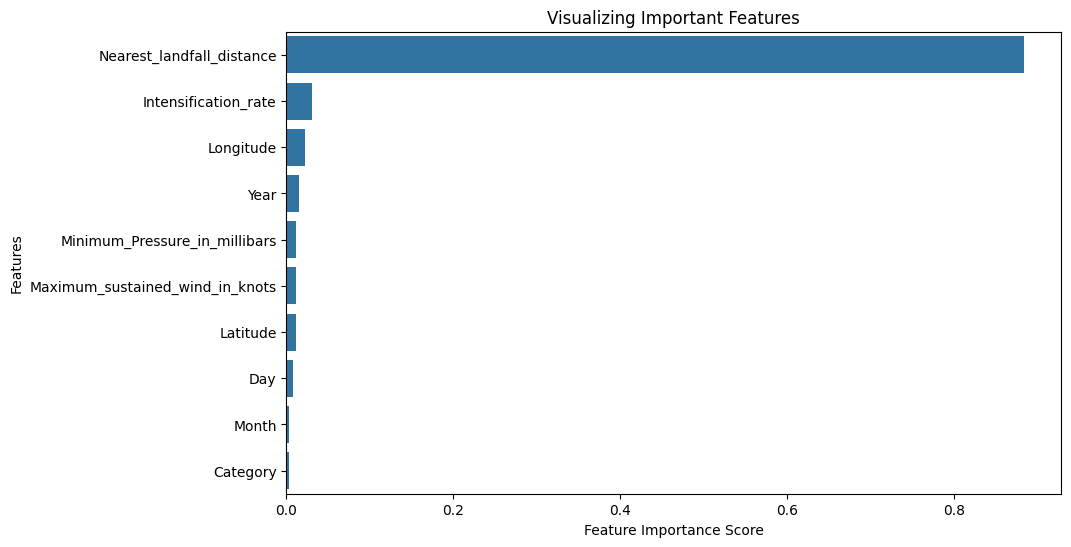

In [410]:
# Get feature importances
feature_importances = best_rf_eng_feautres.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


Evaluation of Logistic Regression Model:
Cross-Validation Scores: [0.99872935 0.99618806 0.99872935 0.99872935 1.        ]
Mean Cross-Validation Accuracy: 0.9984752223634052
Accuracy: 0.9987293519695044
Precision: 0.9537037037037037
Recall: 1.0
F1 Score: 0.976303317535545


/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

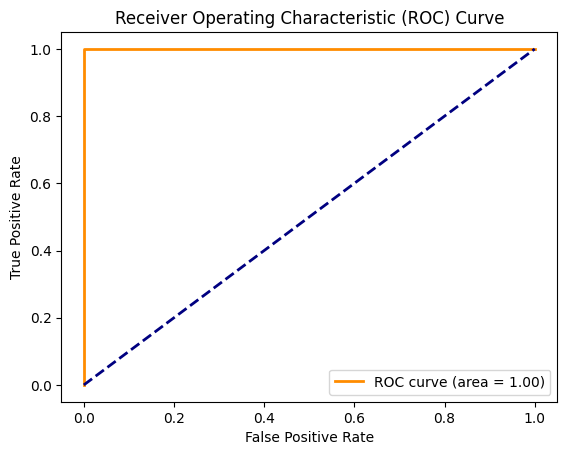


Evaluation of Decision Tree Model:
Cross-Validation Scores: [0.99872935 0.99618806 1.         0.99872935 0.99872935]
Mean Cross-Validation Accuracy: 0.9984752223634052
Accuracy: 0.9987293519695044
Precision: 0.9537037037037037
Recall: 1.0
F1 Score: 0.976303317535545


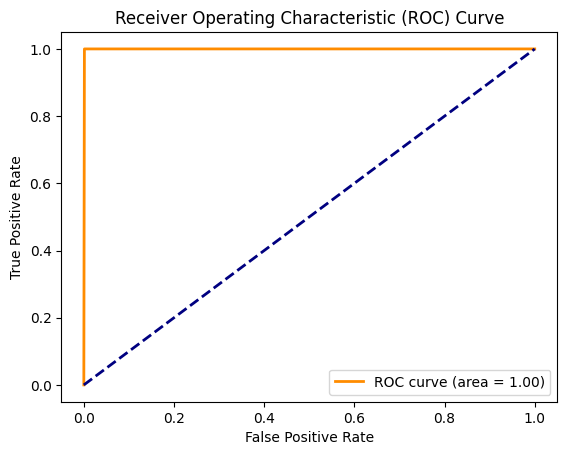


Evaluation of Random Forest Model:
Cross-Validation Scores: [0.99872935 0.99618806 1.         0.99872935 1.        ]
Mean Cross-Validation Accuracy: 0.9987293519695044
Accuracy: 0.9987293519695044
Precision: 0.9537037037037037
Recall: 1.0
F1 Score: 0.976303317535545


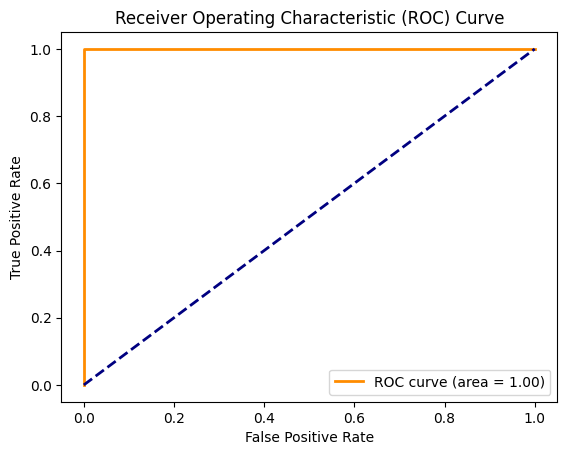

In [411]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Define a function to evaluate the model
def evaluate_model(model, X, y):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Cross-Validation Accuracy:", np.mean(cv_scores))

    # Make predictions
    y_pred = model.predict(X)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # Print evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Plot ROC curve
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_probs)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.show()

# Evaluate Logistic Regression model
print("\nEvaluation of Logistic Regression Model:")
evaluate_model(logistic_model, X_test, y_test)

# Evaluate Decision Tree model
print("\nEvaluation of Decision Tree Model:")
evaluate_model(best_dt_eng_feautres, X_test, y_test)

# Evaluate Random Forest model
print("\nEvaluation of Random Forest Model:")
evaluate_model(best_rf_eng_feautres, X_test, y_test)


### Plot the learning curves of the Final Models

/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aidacamacho/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

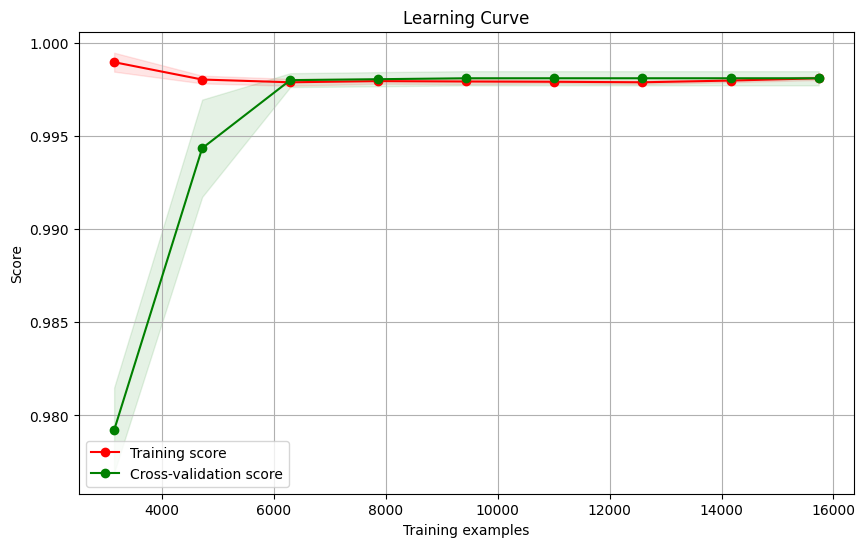

In [412]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=cv)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

plot_learning_curve(logistic_model, X, y)


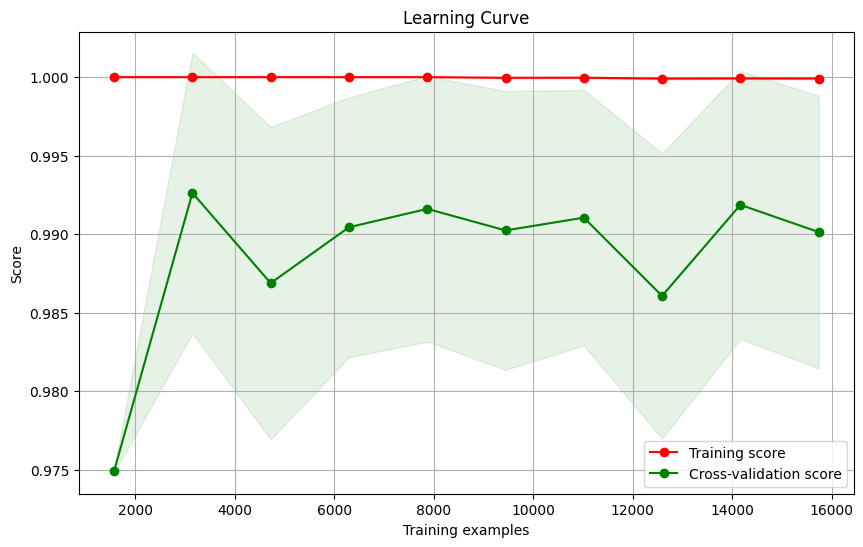

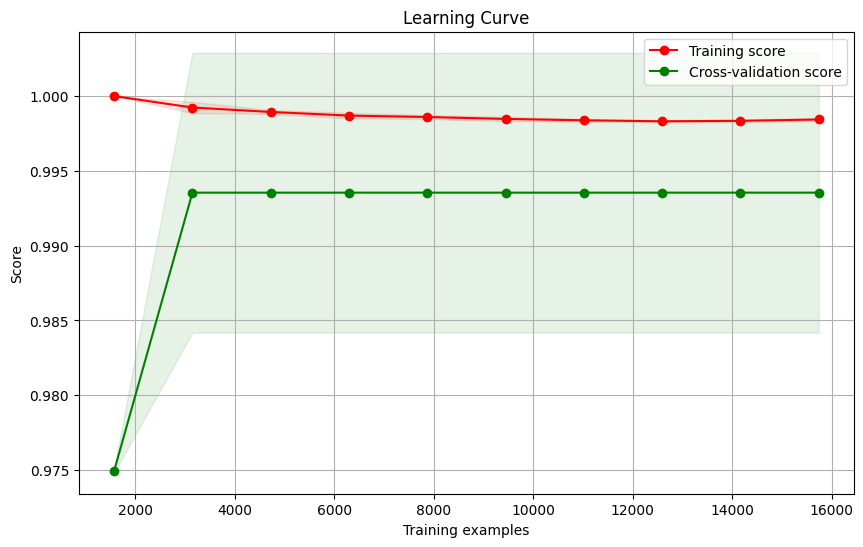

In [413]:
#Learning Curve from model with default parameters
plot_learning_curve(dt_eng_feautres, X, y)

#Learning Curve from model with optimized parameters
plot_learning_curve(best_dt_eng_feautres, X, y)


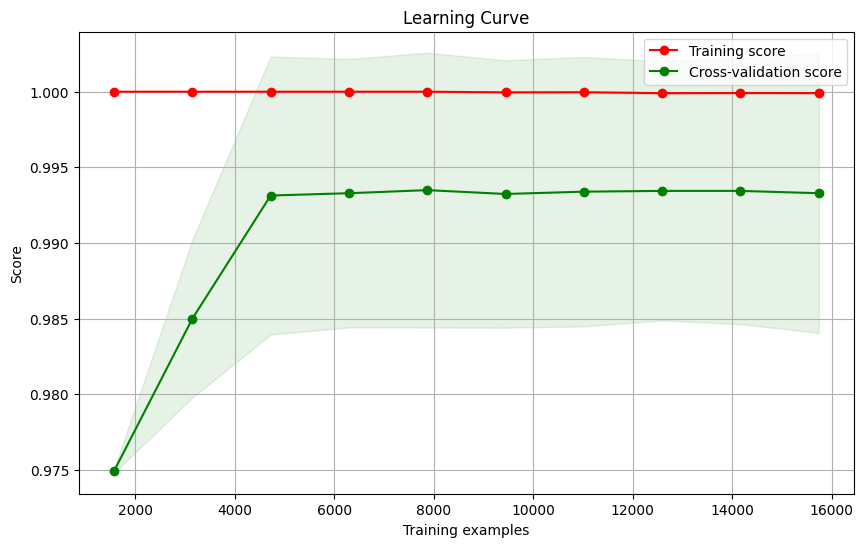

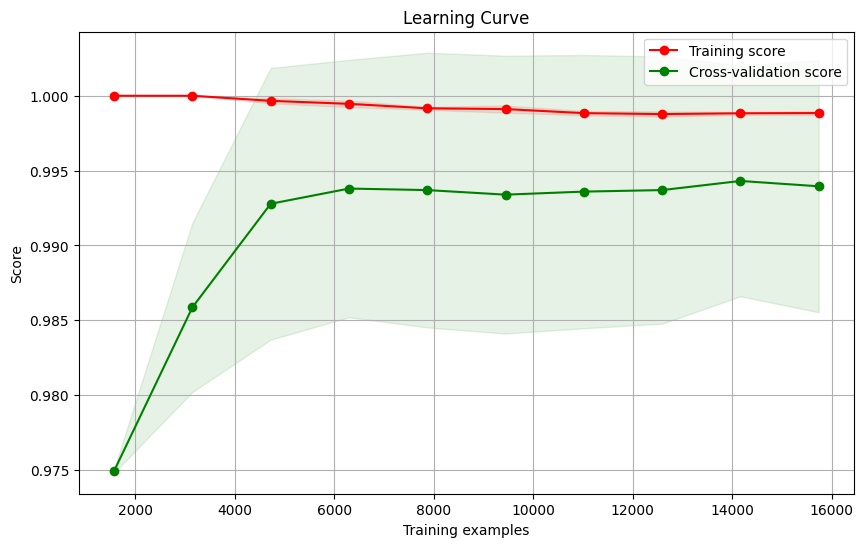

In [414]:
#Learning Curve from Model with default parameters
plot_learning_curve(rf_eng_feautres, X, y)

#Learning Curve from model with optimized parameters
plot_learning_curve(best_rf_eng_feautres, X, y)
